In [1]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt

import torch
import torch_geometric
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric import nn as gnn

from graph_vae import GraphVAE
from train import train_loop, loss_infer
from data_load import *

## Model Definition and training

In [3]:
net = GraphVAE(3, 32, 8)

In [4]:
train_loop(net, 1, 100)

In [4]:
torch.save(net.state_dict(), "Saves/L_50k.pth")

## Inference and tests

In [2]:
from data_load import get_train_dataset

In [3]:
net = GraphVAE(3, 32, 8)
net.load_state_dict(torch.load("Saves/L_50k.pth"))

<All keys matched successfully>

In [4]:
dataset = get_train_dataset(10_000)
dataloader = torch.utils.data.DataLoader(dataset, 200, True)

In [5]:
for (x,) in dataloader:
    img1 = x[:, :, :, 1]
    with torch.no_grad():
        L, img2, counts = loss_infer(net, x)
    break

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0027, 0.0020, 0.0013],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [8]:
counts

[222,
 322,
 334,
 138,
 389,
 278,
 181,
 92,
 434,
 308,
 332,
 176,
 269,
 279,
 179,
 223,
 191,
 392,
 168,
 337,
 194,
 262,
 188,
 168,
 275,
 253,
 258,
 345,
 166,
 747,
 206,
 437,
 297,
 276,
 378,
 283,
 167,
 458,
 178,
 169,
 399,
 474,
 721,
 144,
 48,
 457,
 36,
 280,
 118,
 221,
 205,
 309,
 327,
 129,
 157,
 178,
 194,
 232,
 163,
 177,
 179,
 286,
 125,
 262,
 618,
 196,
 129,
 347,
 149,
 139,
 188,
 87,
 187,
 280,
 338,
 438,
 301,
 342,
 154,
 93,
 191,
 117,
 240,
 332,
 205,
 350,
 130,
 504,
 255,
 225,
 363,
 179,
 279,
 302,
 296,
 416,
 461,
 197,
 351,
 443,
 294,
 172,
 382,
 196,
 257,
 371,
 248,
 296,
 402,
 277,
 270,
 447,
 398,
 193,
 216,
 261,
 505,
 67,
 340,
 179,
 278,
 363,
 613,
 196,
 236,
 289,
 292,
 218,
 275,
 334,
 510,
 300,
 345,
 145,
 168,
 347,
 292,
 141,
 118,
 151,
 237,
 398,
 192,
 418,
 171,
 256,
 220,
 485,
 298,
 325,
 167,
 297,
 266,
 130,
 350,
 217,
 314,
 132,
 547,
 75,
 138,
 259,
 133,
 464,
 175,
 163,
 245,
 273,

In [8]:
img2[0].min()

tensor(0.)

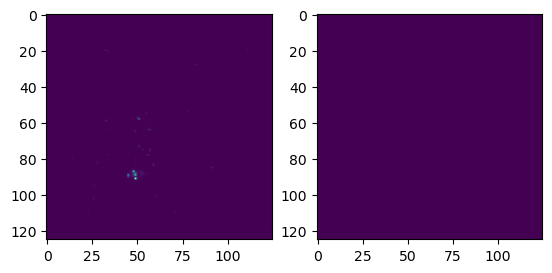

In [9]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1[0]*(256/5))
ax[1].imshow(img2[0]*(256/5))
plt.show()

In [8]:
X, mask = to_dense_batch(G, lengs, fill_value=0, max_num_nodes=1000)
A = to_dense_adj(E, lengs, max_num_nodes=1000) # (batch, 1000, 1000)


In [9]:
X = X
A = A
X.shape, A.shape

(torch.Size([2, 1000, 3]), torch.Size([2, 1000, 1000]))

In [12]:
net = GraphVAE(3, 16, 3)
net

GraphVAE(
  (sage): ModuleList(
    (0): DenseSAGEConv(3, 16)
    (1): DenseSAGEConv(16, 16)
    (2): DenseSAGEConv(16, 3)
  )
  (drop): ModuleList(
    (0): Dropout(p=0.5, inplace=False)
    (1): Dropout(p=0.4, inplace=False)
    (2): Dropout(p=0.3, inplace=False)
  )
  (batch_norm): ModuleList(
    (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool): ModuleList(
    (0): MinCut_Pool(
      (linear): Linear(in_features=16, out_features=500, bias=True)
    )
    (1): MinCut_Pool(
      (linear): Linear(in_features=16, out_features=250, bias=True)
    )
  )
  (tr_mu): Linear(in_features=3, out_features=16, bias=True)
  (tr_var): Linear(in_features=3, out_features=16, bias=True)
  (tr_rev): Linear(in_features=16, out_features=3, bias=True)
  (revsage): ModuleList(

In [42]:
Z, A, mu, logvar, L1, L2 = net(X, A)

In [43]:
Z.shape, A.shape

(torch.Size([2, 1000, 3]), torch.Size([2, 1000, 1000]))